In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

In [66]:
df = process_file('Steatoda A masking 10 am.txt')
display(df)

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-03-07 10:34:00,1,0,0,1,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
2,1,2024-03-07 10:35:00,1,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
3,1,2024-03-07 10:36:00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2024-03-07 10:37:00,1,0,0,0,0,0,7,7,...,0,5,0,0,0,0,0,0,0,0
5,1,2024-03-07 10:38:00,1,0,0,0,0,2,12,6,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,7,2024-03-13 18:54:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9082,7,2024-03-13 18:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9083,7,2024-03-13 18:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
lights = df['Light']

on_times = df[(lights == 1) & (lights.shift(1) == 0)]

display(on_times)

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1286,2,2024-03-08 07:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2726,3,2024-03-09 07:59:00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4166,4,2024-03-10 08:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4406,4,2024-03-10 12:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5606,5,2024-03-11 08:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7046,6,2024-03-12 08:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8486,7,2024-03-13 08:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
%run "plotting_functions.ipynb"

1440


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
2725,3,2024-03-09 07:58:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2726,3,2024-03-09 07:59:00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2727,3,2024-03-09 08:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2728,3,2024-03-09 08:01:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2729,3,2024-03-09 08:02:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,4,2024-03-10 08:55:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4163,4,2024-03-10 08:56:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4164,4,2024-03-10 08:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(<Figure size 640x480 with 7 Axes>,
 array([<Axes: ylabel='1'>, <Axes: ylabel='2'>, <Axes: ylabel='3'>,
        <Axes: ylabel='4'>, <Axes: ylabel='5'>, <Axes: ylabel='6'>,
        <Axes: ylabel='7'>], dtype=object))

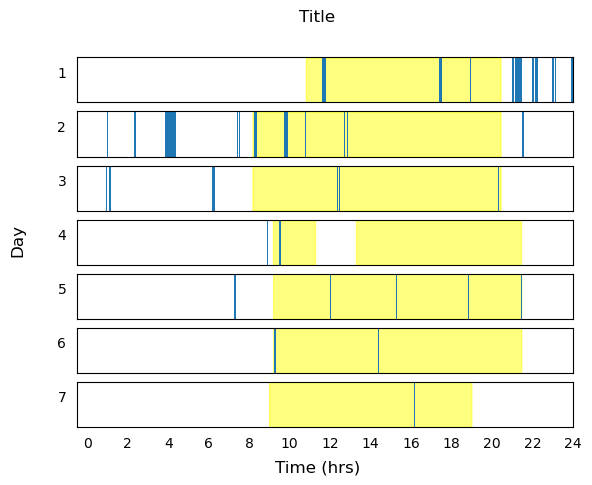

In [96]:
print(4166 - 2726)

extra = df[2724:4166]
display(extra)

spiders = [f'Sp{number}' for number in range(3, 26)]

extra_hour = df[4166 - 60:4166]

rasterplot_binary(df, 'Sp9', 'Title')


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
4105,4,2024-03-10 07:58:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4106,4,2024-03-10 08:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4107,4,2024-03-10 09:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,4,2024-03-10 09:01:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4109,4,2024-03-10 09:02:00,1,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,4,2024-03-10 09:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4166,4,2024-03-10 09:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4167,4,2024-03-10 10:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


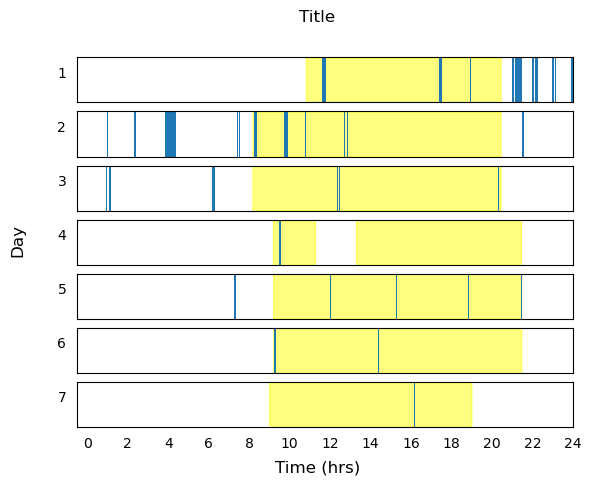

In [107]:
df_extra_removed = df.drop(range(4166-60, 4166))

rasterplot_binary(df_extra_removed, 'Sp9', 'Title')

def func(x):
    if x > 4105:
        return x - 60
    else:
        return x

def func_time(x):
    

df_extra_removed.index = df_extra_removed.index.map(func)

display(df_extra_removed[4166 - 62 : 4166 + 3])